# Example scan

Perform a parameter scan for a given input file and plot the results.

## Scan details

The input file is a scan-enabled version of the large tokamak `IN.DAT`, as found in the `tests` directory. The scan-relevant values are:
```
nsweep = 17 * bmxlim, maximum peak toroidal field (T) (`constraint equation 25`)
isweep = 11
sweep = 11., 11.2, 11.4, 11.6, 11.8, 12., 12.2, 12.4, 12.6, 12.8, 13.
```

- `nsweep`: integer denoting the variable to scan (see `scan_module` for options). Here `17` corresponds to `bmxlim` being scanned
- `isweep`: the number of scan points to run
- `sweep`: array of values for the scanned variable to take; one for each run. Should be of length `isweep`

In [6]:
from process.main import SingleRun
from pathlib import Path

prefix = "a_scan_input_file_"
input_name = Path(prefix + "IN.DAT")

# Perform a SingleRun on a scan-enabled input file
single_run = SingleRun(str(input_name), solver="vmcon_bounded")
single_run.run()

/home/clair/development/PROCESS/examples
/home/clair/development/PROCESS/examples/a_scan_input_file_IN.DAT
The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 3.1.0   Release Date :: 2024-03-21
   Tag No. : v3.1.0-56-gb1b64bf
    Branch : 3091-use-nbmake-or-testbook-to-automate-notebook-testing
   Git log : starting testbook work
 Date/time : 22 May 2024 15:12:22 +01:00(hh:mm) UTC
      User : clair
  Computer : clai

## Plot scan results
Use `plot_scans.py` to plot the resulting `MFILE.DAT`.

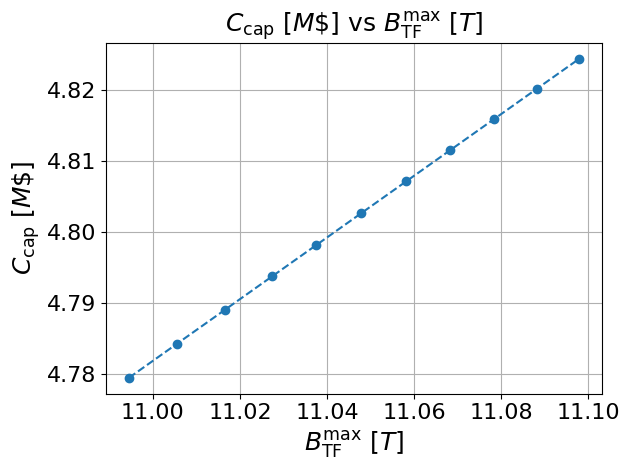

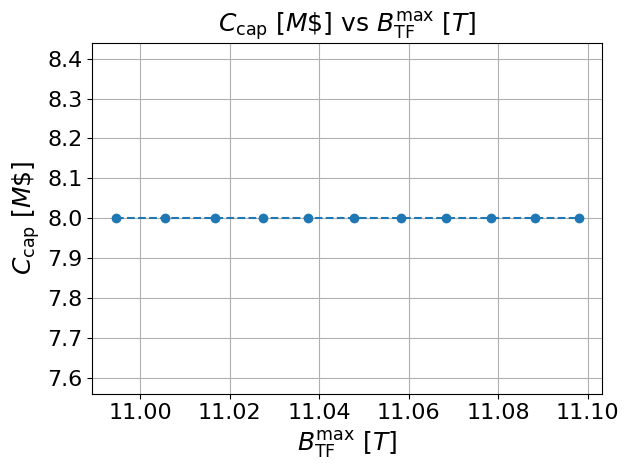

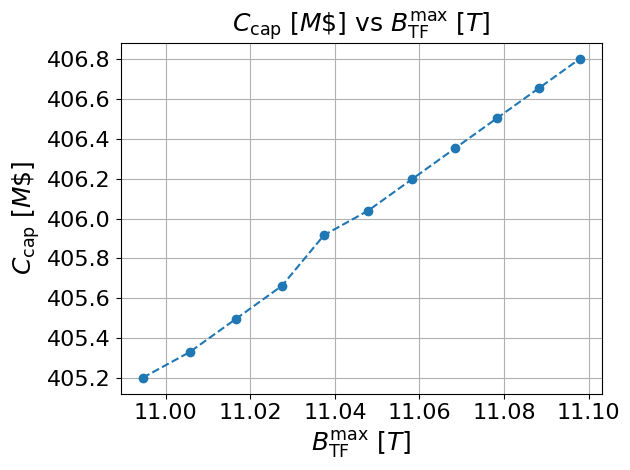

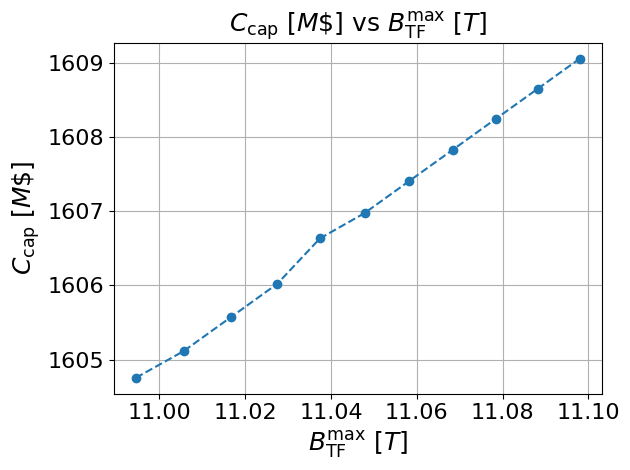

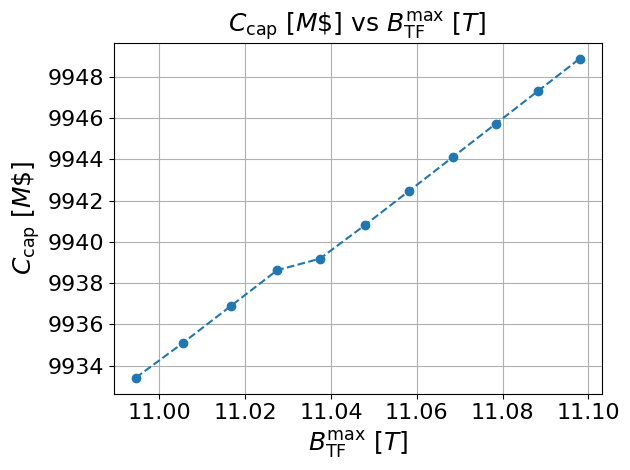

<Figure size 640x480 with 0 Axes>

In [4]:
from process.io import plot_scans

# Define working directory relative to project dir and input file name
mfile_name = Path(prefix + "MFILE.DAT")
output_dir = Path.cwd()

plot_scans.main(
    args=[
        "-f",
        str(mfile_name),
        "-yv",
        "bt rmajor pnetelmw powfmw capcost",
        "--outputdir",
        str(output_dir),
    ]
)